# Lift

This section is about estimating the lift model for the example airplane. At the conceptual phase, a simple lift model can be written as 

$$
    C_L = C_{L_\alpha} (\alpha - \alpha_{L=0}),
$$

where $C_{L_\alpha}$ is the lift curve slope and $\alpha_{L=0}$ is the angle of attack where the lift is zero. The $\alpha_{L=0}$ is zero for an uncambered wing while it is non-zero for cambered wing. Based on a rule of thumb described in Raymer, zero-lift angle of attack can be approximated as the airfoil maximum camber divided by the chord. Otherwise, $\alpha_{L=0}$ can also be set to zero for simplifying the analysis. Note that this model is only for linear region of the lift curve.

The most important parameter in this model is the lift curve slope. In the conceptual phase, it is important to estimate $C_{L_\alpha}$. This is later used for setting wing incidence angle, computing drag polar, and in longitudinal stability analysis. The $C_{L_\alpha}$ is estimated (in 1/radian) using a semi-empirical equation, written as

$$
    C_{L_\alpha} = \frac{2\pi A}{2 + \sqrt{4 + \dfrac{A^2\beta^2}{\eta^2} \bigg( 1 + \dfrac{\tan^2(\Lambda_{max,t/c})}{\beta^2} \bigg) }} \bigg(\frac{S_{exposed}}{S_{ref}}\bigg) F,
$$

where A is the aspect ratio, $\beta$ is the compressibility correction factor, given as 

$$
    \beta = \sqrt{1 - M^2},
$$

where $M$ is the free-stream mach number. The $\eta$ is the airfoil efficiency factor defined as

$$
    \eta = \frac{C_{l_\alpha}}{2\pi/\beta},
$$

where $C_{l_\alpha}$ is the airfoil lift curve slope in 1/radian. The $\Lambda_{max,t/c}$ is the sweep angle at the chord fraction corresponding to maximum thickness. The $S_{exposed}$ is defined as the wing reference area not covered by fuselage, while $S_{ref}$ is the wing planform area (already computed). The $F$ is the fuselage lift-factor given by

$$
    F = 1.07(1 + d/b)^2,
$$

where $d$ is the fuselage width and $b$ is the wing span.

> __*NOTE*__: The maximum value of the product of $F$ and $S_{exposed}/S_{ref}$ should not be more than 1

Below table summarizes various quantities for the example airplane that will be used for computing the lift-curve slope:

<div style="width:100%; margin: auto;">

Parameter | Value | Source
---- | :----: | :----:
Aspect ratio, $A$ | 8 | from initial weight estimation
Free stream mach number, $M$ | 0.3 | cruise condition, 200 knots at 8000 ft
Airfoil efficiency, $\eta$ | 1.0 | assuming (Raymer 12.4.1)
Wing span, $b$ | 33 ft | from wing planform section
Fuselage width | 5 ft | from fuselage sizing section
Wing reference area, $S_{ref}$ | 134 $\text{ft}^2$ | from constraint analysis
Exposed reference area, $S_{exposed}$ | 106 $\text{ft}^2$ | calculated using wing geometry and fuselage width
Sweep at max camber, $\Lambda_{max,t/c}$ | $\sim 0^{\circ}$ | since max t/c at 30% and $\Lambda_{25\%} = 0^{\circ}$

</div>

Below code computes the lift curve slope at in clean configuration and cruise conditions:

In [39]:
# Variables
PI = 3.14159
A = 8
M = 0.3
b = 33 # ft
d = 5 # ft
S_ref = 134 # sq ft
S_exposed = 106 # sq ft

beta = (1 - M**2)**0.5
eta = 1.0
F = 1.07*(1 + d/b)**2

# Lift-curve slope - airplane
numerator = 2*PI*A*min(S_exposed*F/S_ref,0.98)
denominator = 2 + (4 + (A*beta/eta)**2)**0.5 # tan term is removed since tan(0) = 0

CLalpha = numerator / denominator

print(f"Lift-curve slope for airplane: {CLalpha:.2} 1/rad")

Lift-curve slope for airplane: 5.0 1/rad


Below code block plots lift curve for a range of $\alpha$ values:

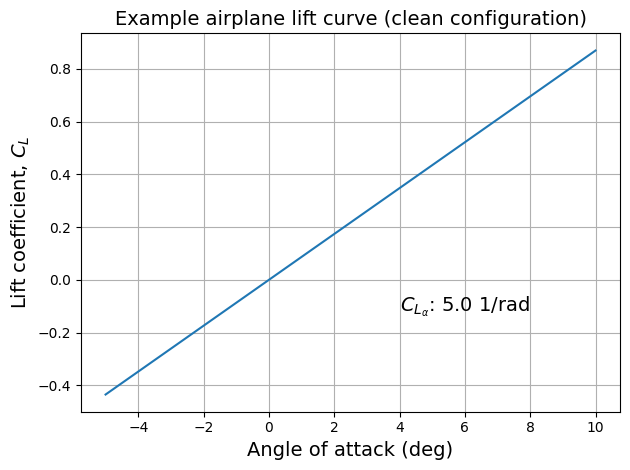

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fs = 14 # fontsize
alpha = np.linspace(-5,10,100) * PI/180 # alpha values, rad
alpha_CLzero = 0 # assumed, rad

CL = CLalpha * (alpha - alpha_CLzero)

fig, ax = plt.subplots()
ax.plot(alpha*180/PI, CL)
ax.set_xlabel("Angle of attack (deg)", fontsize=fs)
ax.set_ylabel("Lift coefficient, $C_L$", fontsize=fs)
ax.set_title("Example airplane lift curve (clean configuration)", fontsize=fs)
ax.annotate(r"$C_{L_\alpha}$: " + f"{CLalpha:.2} 1/rad", (6,-0.1), fontsize=fs, ha="center", va="center")
ax.grid()
plt.tight_layout()

Note the range of angle of attack, you probably shouldn't go beyond this range due to the nonlinear effects. This concludes the lift section for the example airplane.